### Лабораторная работа №1 (вариант 10)

# Построение датчиков БСВ

### 1. Мультипликативно-конгруентный датчик

In [1]:
a = 16807
b = 16807
m = 2**31

In [2]:
class Generator1:
    def __init__(self, a, b, m):
        self.base = a
        self.a = a
        self.b = b
        self.m = m
        
    def rand(self):
        self.a = (self.a * self.b) % self.m
        return self.a / self.m
    
    def reset(self):
        self.a = self.base
        return self
    
    def get_period(self):
        period = 0
        while(period <= self.m):
            self.rand()
            period += 1
            if(self.a == self.base):
                return(period)
        return -1

In [3]:
list1 = []
gen1 = Generator1(a, b, m)

for i in range(0, 1000):
    list1.append(gen1.rand())
    if(i < 10):
        print(list1[i])

0.1315377880819142
0.7556042927317321
0.44134794222190976
0.7348649236373603
0.8747715731151402
0.2858293461613357
0.9338209335692227
0.7284304979257286
0.7313786377198994
0.2807641583494842


In [4]:
# Определим период построенного датчика

#print("T = " + str(gen1.get_period()))

# T = 268434456 

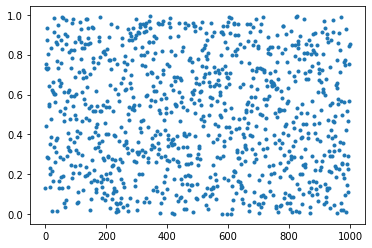

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(0, 1000)], list1, '.')

### 2. Датчик на основе нелинейных реккурентных формул

In [6]:
a = 16807
b = 16807
c = 37
g = 10
m = 2**31

In [7]:
# Период такого датчика будет равен M=2^31

In [8]:
class Generator2:
    def __init__(self, a, b, c, g, m):
        self.base = a
        self.a = a
        self.b = b
        self.c = c
        self.g = g
        self.m = m
        
    def reset(self):
        self.a = self.base
        return self
        
    def rand(self):
        self.a = (g * self.a * self.a + self.a * self.b + self.c) % self.m
        return self.a / self.m

In [9]:
list2 = []
gen2 = Generator2(a, b, c, g, m)

for i in range(0, 1000):
    list2.append(gen2.rand())
    if(i < 10):
        print(list2[i])

0.4469156861305237
0.060548263136297464
0.4807263920083642
0.27407721942290664
0.45434522442519665
0.8374517154879868
0.06728929933160543
0.0897158901207149
0.3819110207259655
0.37396890530362725


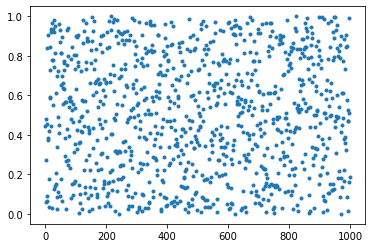

In [10]:
plt.plot([i for i in range(0, 1000)], list2, '.')

### 3. Датчик Маклорена-Марсальи (на основе двух предыдущих)

In [11]:
import math

In [12]:
k = 64

In [13]:
class Generator3:
    def __init__(self, k, gen1, gen2):
        self.k = k
        self.gen1 = gen1
        self.gen2 = gen2
        self.v = []
        for i in range(0, k):
            self.v.append(gen1.rand())
            
    def reset(self):
        self.gen1.reset()
        self.gen2.reset()
        self.v = []
        for i in range(0, k):
            self.v.append(gen1.rand())
        return self
        
    def rand(self):
        index = math.floor(self.gen2.rand() * self.k)
        value = self.v[index]
        self.v[index] = self.gen1.rand()
        return value

In [14]:
list3 = []
gen3 = Generator3(k, gen1.reset(), gen2.reset())

for i in range(0, 1000):
    list3.append(gen3.rand())
    if(i < 10):
        print(list3[i])

0.914796479512006
0.7348649236373603
0.33447730587795377
0.34988268790766597
0.984431158285588
0.18687627790495753
0.8747715731151402
0.2858293461613357
0.6633048285730183
0.6216257098130882


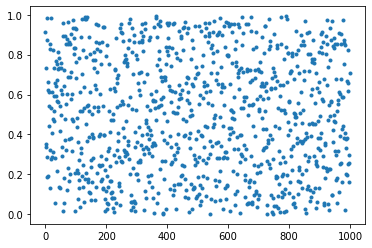

In [15]:
plt.plot([i for i in range(0, 1000)], list3, '.')

# Проверка построенных датчиков

### Реализация критерия хи-квадрат Пирсона

In [16]:
def frec(val_obs, n):
    f_obs = []
    for i in range(0, n):
        f_obs.append(0)
    
    # calculate observed frequences
    i = 0
    val_sorted = sorted(val_obs)
    for val in val_sorted:
        if(val < (i+1)/n and val >= i/n):
            f_obs[i] += 1
        else:
            i += 1
            f_obs[i] += 1
        
    return f_obs

In [17]:
def chisquare(val_obs, n):
    f_exp = len(val_obs)/n
    f_obs = frec(val_obs, n)
          
    # calculate chisquare
    chisquare = 0.0
    for i in range(0, n):
        chisquare += ((f_obs[i] - f_exp)**2 / f_exp)
        
    return chisquare

In [18]:
# Compare with scipy chisquare

from scipy.stats import chisquare as chi

print("Custom chisqare = " + str(chisquare(list2, 13)))
print(" Scipy chisqare = " + str(chi(frec(list2, 13)).statistic))

Custom chisqare = 11.504000000000001
 Scipy chisqare = 11.504000000000001


### Проверка по критерию хи-квадрат Пирсона

In [19]:
# Для 5 степеней свободы

treshhold_value = 11.071

print("Treshhold -> " + format(treshhold_value, '.3f'))
print("---------------------------")
print("gen1 -> " + format(chisquare(list1, 6), '.3f'))
print("gen2 -> " + format(chisquare(list2, 6), '.3f'))
print("gen3 -> " + format(chisquare(list3, 6), '.3f'))

Treshhold -> 11.071
---------------------------
gen1 -> 2.444
gen2 -> 8.540
gen3 -> 3.092


In [20]:
# Для 15 степеней свободы

treshhold_value = 26.296

print("Treshhold -> " + format(treshhold_value, '.3f'))
print("---------------------------")
print("gen1 -> " + format(chisquare(list1, 16), '.3f'))
print("gen2 -> " + format(chisquare(list2, 16), '.3f'))
print("gen3 -> " + format(chisquare(list3, 16), '.3f'))

Treshhold -> 26.296
---------------------------
gen1 -> 8.736
gen2 -> 16.352
gen3 -> 9.280


### Реализация критерия согласия Колмогорова

In [21]:
import numpy

def kolm(val_obs):
    val_sorted = sorted(val_obs)
    sup_d = 0
    for i in range(1, len(val_sorted)):
        f1 = i
        f2 = (i + 1)
        f3 = val_sorted[i] * len(val_sorted)
        d = max(abs(f1 - f3), abs(f2 - f3))
        if(d > sup_d):
            sup_d = d
            
    return sup_d / len(val_sorted)

In [22]:
#critical value of D for n elements

def crit(n):
    return 1.22 / numpy.sqrt(n)

### Проверка по критерию Колмогорова

In [23]:
treshhold_value = crit(1000)

print("Treshhold -> " + format(treshhold_value, '.4f'))
print("---------------------------")
print("gen1 -> " + format(kolm(list1), '.4f'))
print("gen2 -> " + format(kolm(list2), '.4f'))
print("gen3 -> " + format(kolm(list3), '.4f'))

Treshhold -> 0.0386
---------------------------
gen1 -> 0.0257
gen2 -> 0.0200
gen3 -> 0.0247


In [24]:
for i in range(1):
    dast = gen3.rand()

# Лабораторная работа №2

In [25]:
import math

## Часть 1 - создание моделей

### Отрицательное биномиальное

In [26]:
def genDRV_bin(m, p):
    q = 1 - p
    p = p**m
    r = gen3.rand() - p
    
    z = 0
    while(r >= 0):
        z += 1
        p = p * q * ((m - 1 + z) / z)
        r -= p
    
    return z

### Пуассона

In [27]:
def genDRV_puas(l):
    p = math.exp(-1 * l)
    r = gen3.rand() - p

    x = 0
    while(r >= 0):
        x += 1
        p = (p * l) / x
        r -= p
        
    return x

### Геометрическое

In [28]:
def genDRV_geom(p):
    a = gen3.rand()
    return math.floor(math.log(a) / math.log(1 - p)) + 1

## Часть 2 - оценки матожидания и дисперсии

In [29]:
n = 1000

In [30]:
def get_expectation(val):
    e_obs = 0
    
    for x in val:
        e_obs += x
        
    e_obs /= len(val)
    return e_obs

In [31]:
def get_dispersion(val):
    d = 0
    mean = 0
    
    for x in val:
        mean += x
    mean /= len(val)
    
    for x in val:
        d += (x - mean)**2
    d /= (len(val) - 1)
    
    return d

### Отрицательное биномиальное  (r = 6, p = 0.25)

In [32]:
r1 = 6
p1 = 0.25

In [33]:
val1 = list()
for i in range(n):
    val1.append(genDRV_bin(r1, p1))

In [34]:
# найдем оценки матожидания и дисперсии по сгенерированной выборке
e_obs1 = get_expectation(val1)
d_obs1 = get_dispersion(val1)

In [35]:
# для отрицательно биномиального распределения матожидание равно (r*q) / p
# для отрицательно биномиального распределения дисперсия равна (r*q) / (p^2)
e_exp1 = r1 * (1 - p1) / p1
d_exp1 = r1 * (1 - p1) / (p1**2) 

In [36]:
print('E_exp = ' + format(e_exp1, '.2f'))
print('E_obs = ' + format(e_obs1, '.2f'))
print('-----------------------------------')
print('D_exp = ' + format(d_exp1, '.2f'))
print('D_obs = ' + format(d_obs1, '.2f'))

E_exp = 18.00
E_obs = 17.78
-----------------------------------
D_exp = 72.00
D_obs = 77.33


### Отрицательное биномиальное  (r = 4, p = 0.20)

In [37]:
r2 = 4
p2 = 0.2

In [38]:
val2 = []
for i in range(n):
    val2.append(genDRV_bin(r2, p2))

In [39]:
# найдем оценки матожидания и дисперсии по сгенерированной выборке
e_obs2 = get_expectation(val2)
d_obs2 = get_dispersion(val2)

In [40]:
# для отрицательно биномиального распределения матожидание равно (r*q) / p
# для отрицательно биномиального распределения дисперсия равна (r*q) / (p^2)
e_exp2 = r2 * (1 - p2) / p2
d_exp2 = r2 * (1 - p2) / (p2**2) 

In [41]:
print('E_exp = ' + format(e_exp2, '.2f'))
print('E_obs = ' + format(e_obs2, '.2f'))
print('-----------------------------------')
print('D_exp = ' + format(d_exp2, '.2f'))
print('D_obs = ' + format(d_obs2, '.2f'))

E_exp = 16.00
E_obs = 15.83
-----------------------------------
D_exp = 80.00
D_obs = 80.11


### Пуассона (l = 3)

In [42]:
l = 3

In [43]:
val3 = []
for i in range(n):
    val3.append(genDRV_puas(l))

In [44]:
# найдем оценки матожидания и дисперсии по сгенерированной выборке
e_obs3 = get_expectation(val3)
d_obs3 = get_dispersion(val3)

In [45]:
# для распределения Пуассона матожидание и дисперсия совпадают со значением l 
e_exp3 = l
d_exp3 = l

In [46]:
print('E_exp = ' + format(e_exp3, '.2f'))
print('E_obs = ' + format(e_obs3, '.2f'))
print('-----------------------------------')
print('D_exp = ' + format(d_exp3, '.2f'))
print('D_obs = ' + format(d_obs3, '.2f'))

E_exp = 3.00
E_obs = 3.03
-----------------------------------
D_exp = 3.00
D_obs = 3.07


### Геометрическое (p = 0.25)

In [47]:
p = 0.25

In [48]:
val4 = []
for i in range(n):
    val4.append(genDRV_geom(p))

In [49]:
# найдем оценки матожидания и дисперсии по сгенерированной выборке
e_obs4 = get_expectation(val4)
d_obs4 = get_dispersion(val4)

In [50]:
# для геометрического распределения матожидание равно 1 / p 
# для геометрического распределения дисперсия равна q / (p**2) 
e_exp4 = 1 / p
d_exp4 = (1 - p) / (p**2)

In [51]:
print('E_exp = ' + format(e_exp4, '.2f'))
print('E_obs = ' + format(e_obs4, '.2f'))
print('-----------------------------------')
print('D_exp = ' + format(d_exp4, '.2f'))
print('D_obs = ' + format(d_obs4, '.2f'))

E_exp = 4.00
E_obs = 3.99
-----------------------------------
D_exp = 12.00
D_obs = 11.16


## Часть 3 - хи-квадрат критерии

In [52]:
import matplotlib.pyplot as plt

In [53]:
def chisquare(frec_obs, frec_exp):
    
    chisquare = 0.0
    for i in range(len(frec_obs)):
        chisquare += ((frec_obs[i] - frec_exp[i])**2 / frec_exp[i])
        
    return chisquare

### Отрицательное биномиальное (general)

In [54]:
from scipy.special import comb

In [55]:
# ряд распределения

def p_binom(x, r, p):
    if (x < 0):
        return 0
    else:
        return comb(x + r - 1, x)*(p**r)*((1-p)**x)

In [56]:
# пределы гистограммы от 0 до 2*E, считаем ожидаемые частоты попадания в каждую область гистограммы

def exp_frec_binom(r, p):
    lim = 2 * math.floor(r * (1 - p) / p)
    frec_exp = []
    p_sum = 0

    for i in range(lim):
        _p = p_binom(i, r, p)
        p_sum += _p
        frec_exp.append(_p * n)
    
    frec_exp.append(n * (1 - p_sum))
    return frec_exp

In [57]:
# считаем выборочные частоты попадания в области гистограммы

def obs_frec_binom(val_obs, r, p):
    lim = 2 * math.floor(r * (1 - p) / p)
    f_obs = []
    for i in range(lim + 1):
        f_obs.append(0)
    
    # calculate observed frequences
    val_sorted = sorted(val_obs)
    for val in val_sorted:
        if(val < lim):
            f_obs[val] += 1
        else:
            f_obs[lim] += 1
        
    return f_obs

### Отрицательное биномиальное  (r = 6, p = 0.25)

In [58]:
r1 = 6
p1 = 0.25

In [59]:
frec_exp1 = exp_frec_binom(r1, p1)
frec_obs1 = obs_frec_binom(val1, r1, p1)

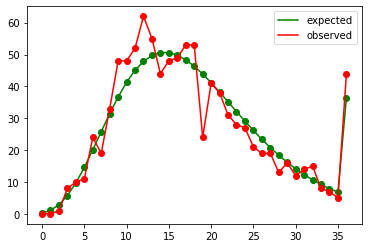

In [60]:
X_val = range(2 * math.floor(r1 * (1 - p1) / p1) + 1)
X, Ye, Yo = numpy.array(X_val), numpy.array(frec_exp1), numpy.array(frec_obs1)

plt.plot(X, Ye, 'go')
plt.plot(X, Ye, 'g-', label = 'expected')
plt.plot(X, Yo, 'ro')
plt.plot(X, Yo, 'r-', label = 'observed')
plt.legend()
plt.show()

In [61]:
# количество степеней свободы
print(len(X_val) - 1)

36


In [62]:
# crit > 40
print(chisquare(frec_obs1, frec_exp1))

38.16157487760613


### Отрицательное биномиальное  (r = 4, p = 0.20)

In [63]:
r2 = 4
p2 = 0.20

In [64]:
frec_exp2 = exp_frec_binom(r2, p2)
frec_obs2 = obs_frec_binom(val2, r2, p2)

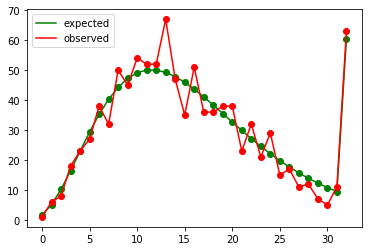

In [65]:
X_val = range(2 * math.floor(r2 * (1 - p2) / p2) + 1)
X, Ye, Yo = numpy.array(X_val), numpy.array(frec_exp2), numpy.array(frec_obs2)

plt.plot(X, Ye, 'go')
plt.plot(X, Ye, 'g-', label = 'expected')
plt.plot(X, Yo, 'ro')
plt.plot(X, Yo, 'r-', label = 'observed')
plt.legend()
plt.show()

In [66]:
# количество степеней свободы
print(len(X_val) - 1)

32


In [67]:
# crit > 40
print(chisquare(frec_obs2, frec_exp2))

30.384164343673046


### Пуассона (l = 3)

In [68]:
l = 3

In [69]:
# ряд распределения

def p_puas(x, l=3):
    if (x < 0):
        return 0
    else:
        return math.exp(-1 * l) * (l**x) / math.factorial(x)

In [70]:
# пределы гистограммы от 0 до 2*l, считаем ожидаемые частоты попадания в каждую область гистограммы

def exp_frec_puas(l=3):
    frec_exp = []
    p_sum = 0

    for i in range(2*l + 1):
        p = p_puas(i)
        p_sum += p
        frec_exp.append(p * n)
    
    frec_exp.append(n * (1 - p_sum))
    return frec_exp


frec_exp3 = exp_frec_puas()
print(frec_exp3)

[49.787068367863945, 149.36120510359183, 224.04180765538774, 224.04180765538774, 168.03135574154084, 100.81881344492447, 50.40940672246224, 33.508535308841125]


In [71]:
# считаем выборочные частоты попадания в области гистограммы

def obs_frec_puas(val_obs, l=3):
    f_obs = []
    for i in range(2*l + 2):
        f_obs.append(0)
    
    # calculate observed frequences
    val_sorted = sorted(val_obs)
    for val in val_sorted:
        if(val <= 2*l):
            f_obs[val] += 1
        else:
            f_obs[2*l + 1] += 1
        
    return f_obs

frec_obs3 = obs_frec_puas(val3)
print(frec_obs3)

[55, 142, 201, 245, 178, 89, 53, 37]


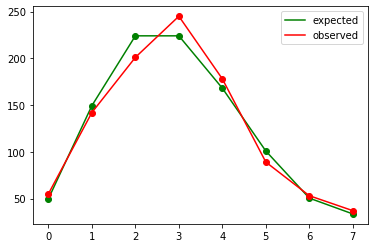

In [72]:
X_val = range(2*l + 2)
X, Ye, Yo = numpy.array(X_val), numpy.array(frec_exp3), numpy.array(frec_obs3)

plt.plot(X, Ye, 'go')
plt.plot(X, Ye, 'g-', label = 'expected')
plt.plot(X, Yo, 'ro')
plt.plot(X, Yo, 'r-', label = 'observed')
plt.legend()
plt.show()

In [73]:
# crit = 14.1
print(chisquare(frec_obs3, frec_exp3))

7.712753191434346


### Геометрическое (p = 0.25)

In [74]:
p = 0.25

In [75]:
# ряд распределения

def p_geom(x, p=0.25):
    if (x < 1):
        return 0
    else:
        return p * ((1 - p)**(x - 1))

In [76]:
lim = math.floor(6/p)

# пределы гистограммы от 1 до lim, считаем ожидаемые частоты попадания в каждую область гистограммы

def exp_frec_geom(p=0.25):
    frec_exp = []
    p_sum = 0

    for i in range(1, lim):
        _p = p_geom(i)
        p_sum += _p
        frec_exp.append(_p * n)
    
    frec_exp.append(n * (1 - p_sum))
    return frec_exp


frec_exp4 = exp_frec_geom()
print(frec_exp4)

[250.0, 187.5, 140.625, 105.46875, 79.1015625, 59.326171875, 44.49462890625, 33.3709716796875, 25.028228759765625, 18.77117156982422, 14.078378677368164, 10.558784008026123, 7.919088006019592, 5.939316004514694, 4.454487003386021, 3.3408652525395155, 2.5056489394046366, 1.8792367045534775, 1.409427528415108, 1.057070646311331, 0.7928029847334983, 0.5946022385501237, 0.4459516789125928, 1.3378550367377784]


In [77]:
# считаем выборочные частоты попадания в области гистограммы

def obs_frec_geom(val_obs, p=0.25):
    f_obs = []
    for i in range(1, lim + 1):
        f_obs.append(0)
    
    # calculate observed frequences
    val_sorted = sorted(val_obs)
    for val in val_sorted:
        if(val < lim):
            f_obs[val - 1] += 1
        else:
            f_obs[lim - 1] += 1
        
    return f_obs

frec_obs4 = obs_frec_geom(val4)
print(frec_obs4)

[221, 216, 121, 128, 86, 64, 34, 32, 27, 15, 17, 12, 4, 8, 5, 3, 3, 0, 1, 0, 1, 0, 0, 2]


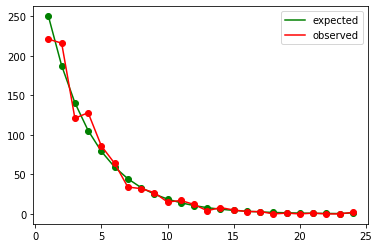

In [78]:
X_val = range(1, lim + 1)
X, Ye, Yo = numpy.array(X_val), numpy.array(frec_exp4), numpy.array(frec_obs4)

plt.plot(X, Ye, 'go')
plt.plot(X, Ye, 'g-', label = 'expected')
plt.plot(X, Yo, 'ro')
plt.plot(X, Yo, 'r-', label = 'observed')
plt.legend()
plt.show()

In [79]:
# количество степеней свободы
print(len(X_val) - 1)

23


In [80]:
# crit = 35.2
print(chisquare(frec_obs4, frec_exp4))

27.79683656282702


## Часть 4 - хи-квадрат критерии для неподходящих распределений

#### Возьмем выборку для геометрического распределения и проверим, не принадлежит ли она распределению Пуассона

In [81]:
frec_exp = frec_exp3
frec_obs = obs_frec_puas(val4)

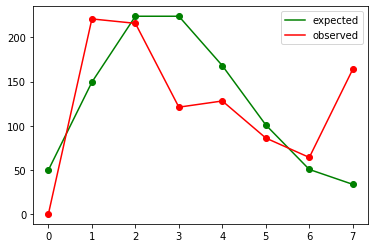

In [82]:
X_val = range(2*l + 2)
X, Ye, Yo = numpy.array(X_val), numpy.array(frec_exp), numpy.array(frec_obs)

plt.plot(X, Ye, 'go')
plt.plot(X, Ye, 'g-', label = 'expected')
plt.plot(X, Yo, 'ro')
plt.plot(X, Yo, 'r-', label = 'observed')
plt.legend()
plt.show()

In [83]:
# количество степеней свободы
print(len(X_val) - 1)

7


In [84]:
# crit = 14.1
print(chisquare(frec_obs, frec_exp))

655.3762694259287


#### Возьмем выборку для отрицательного биномиального распределения с параметрами (r=6, p=0.25) и проверим, не принадлежит ли она распределению с параметраим (r=4, p=0.20) 

In [85]:
frec_exp = frec_exp2
frec_obs = obs_frec_binom(val1, 4, 0.2)

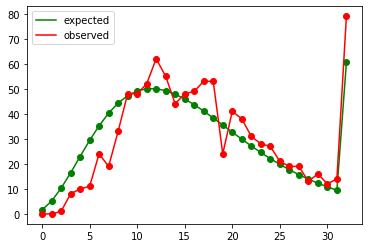

In [86]:
X_val = range(2 * math.floor(r2 * (1 - p2) / p2) + 1)
X, Ye, Yo = numpy.array(X_val), numpy.array(frec_exp), numpy.array(frec_obs)

plt.plot(X, Ye, 'go')
plt.plot(X, Ye, 'g-', label = 'expected')
plt.plot(X, Yo, 'ro')
plt.plot(X, Yo, 'r-', label = 'observed')
plt.legend()
plt.show()

In [87]:
# количество степеней свободы
print(len(X_val) - 1)

32


In [88]:
# crit < 50
print(chisquare(frec_obs, frec_exp))

89.75905230913101
